In [12]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Read dataframe from csv file
file = "./data/processed_data/2010-2023_NSS_filtered_vF.csv"
df = pd.read_csv(file)

<AxesSubplot: >

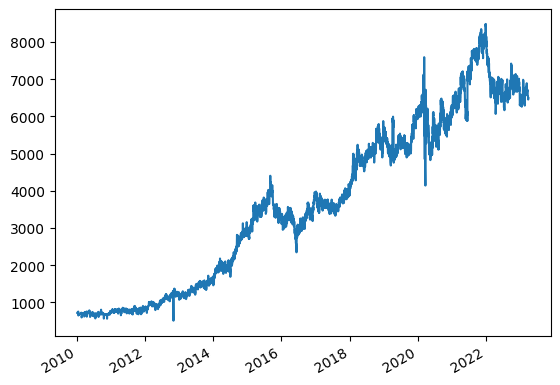

In [14]:
# Turn the date column into a datetime object
df["Quote_date"] = pd.to_datetime(df["Quote_date"])

# Plot number of options per day
df["Quote_date"].value_counts().plot()

<AxesSubplot: ylabel='Frequency'>

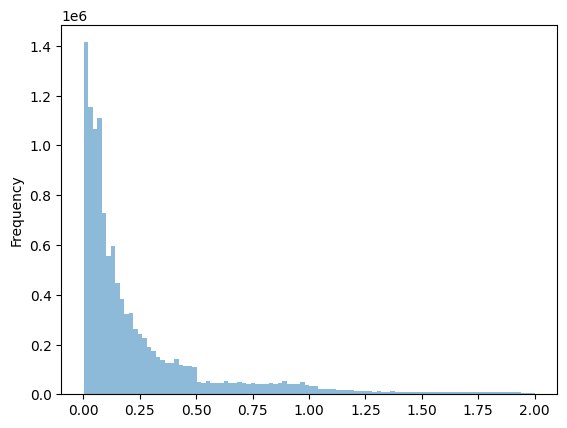

In [15]:
# Plot distribution of TTM
df['TTM'].plot.hist(bins=100, alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

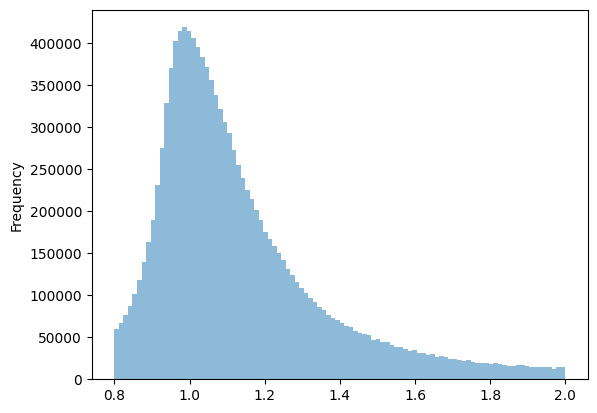

In [16]:
# Create a new column with the moneyness
df['Moneyness'] = df['Underlying_last'] / df['Strike']

# Plot the distribution of moneyness
df['Moneyness'].plot.hist(bins=100, alpha=0.5)

In [17]:
# Find bottom and top 5 percentiles of moneyness
print(df['Moneyness'].quantile([0.05, 0.95]))

0.05    0.880249
0.95    1.627458
Name: Moneyness, dtype: float64


<AxesSubplot: xlabel='Quote_date'>

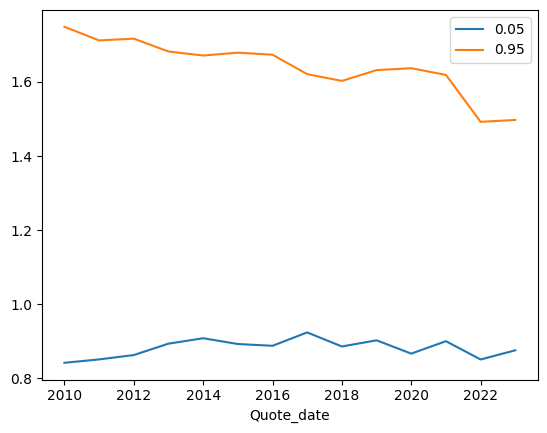

In [18]:
# Make quote date datetime
df['Quote_date'] = pd.to_datetime(df['Quote_date'])

# Plot botton and top 5 percentile of moneyness by year
df.groupby(df['Quote_date'].dt.year)['Moneyness'].quantile([0.05, 0.95]).unstack().plot()

<AxesSubplot: ylabel='Frequency'>

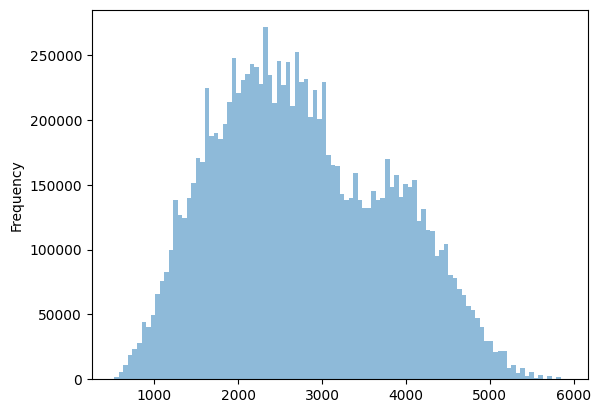

In [19]:
# Plot distribution of strike price
df['Strike'].plot.hist(bins=100, alpha=0.5)

In [20]:
df_y = df
df_y['Quote_date'] = pd.to_datetime(df['Quote_date'])
df_y = df_y.groupby(df_y['Quote_date'].dt.year).count()
df_y['cumulative_count'] = df_y['Price'].cumsum()
print(df_y[['Price', 'cumulative_count']])


              Price  cumulative_count
Quote_date                           
2010         168053            168053
2011         191156            359209
2012         259343            618552
2013         345503            964055
2014         554101           1518156
2015         869602           2387758
2016         811805           3199563
2017         919659           4119222
2018        1249553           5368775
2019        1317848           6686623
2020        1454856           8141479
2021        1762541           9904020
2022        1750816          11654836
2023         402807          12057643


In [21]:
for i in range(1, 11):
    print(i, 500000/i)

1 500000.0
2 250000.0
3 166666.66666666666
4 125000.0
5 100000.0
6 83333.33333333333
7 71428.57142857143
8 62500.0
9 55555.555555555555
10 50000.0
